### Introduction to Machine Learning with Python
## Chapter 1. 소개
---
# Scikit-learn 맛보기

### Iris(붓꽃) 데이터
- https://en.wikipedia.org/wiki/Iris_flower_data_set 참조
- 1936년 한 영국 통계학자에 의해 선형분류 문제의 예제로 활용되면서 머신러닝의 대표적인 예제로 활용되고 있다.
- 속성 : 꽃받침 길이(sepal length), 꽃받침 폭(sepal width), 꽃잎 길이(petal length), 꽃잎 폭(petal width)
- 타겟값(목표값) : setosa, versicolor, verginica
- 샘플 갯수 : 150개 (세품종 각각 50개씩)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
display(iris.target, iris.target.shape)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(150,)

In [6]:
display(iris.target[iris.target==0].shape, iris.target[iris.target==1].shape, iris.target[iris.target==2].shape)

(50,)

(50,)

(50,)

In [7]:
display(iris.data.shape, iris.data[:5])

(150, 4)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 훈련세트와 테스트세트로 분리
- 머신러닝은 훈련 과정과 테스트 과정 두가지로 분리된다.
- 훈련세트를 가지고 예측모델을 훈련시킨 다음에 테스트세트로 훈련 성과를 판단한다.
- sklearn.model_selection.train_test_split() 함수를 사용하면 편리하게 나눌 수 있다.
- train_test_split() 함수는 기본값으로 훈련세트를 75%, 테스트세트를 25% 로 나눈다.
>참고 : 전통적으로 데이터는 대문자 X, 타겟(또는 레이블)은 소문자 y 로 표시한다.

In [8]:
from sklearn.model_selection import train_test_split

#help(train_test_split)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4)

(38, 4)

(112,)

(38,)

In [10]:
display(X_train[:5], y_train[:5])

array([[6.7, 3. , 5.2, 2.3],
       [7. , 3.2, 4.7, 1.4],
       [5.1, 3.3, 1.7, 0.5],
       [6.5, 2.8, 4.6, 1.5],
       [5.8, 2.7, 3.9, 1.2]])

array([2, 1, 0, 1, 1])

### 4가지 속성에 대해 산점도 그리기
- 산점도(scatter map)은 두 가지 속성을 가진 데이터를 그래프에 점을 찍어 표시한 그림이다.
- Iris 데이터의 4가지 속성에 대해 짝을 지어 산점도를 그려보자.

In [11]:
import pandas as pd

iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.7,3.0,5.2,2.3
1,7.0,3.2,4.7,1.4
2,5.1,3.3,1.7,0.5
3,6.5,2.8,4.6,1.5
4,5.8,2.7,3.9,1.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018519EBB978>,
      dtype=object)

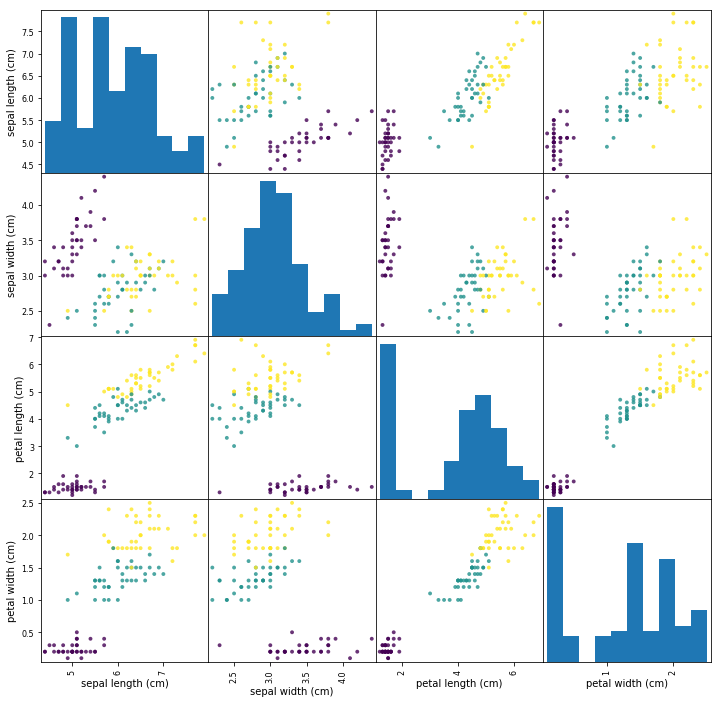

In [12]:
pd.plotting.scatter_matrix(iris_df, c=y_train, s=60, alpha=0.8, figsize=[12,12])

### k-NN (최근접 이웃) 예측모델 적용
- k-NN 모델은 가장 가까이에 있는 k 갯수의 이웃 점들을 기준으로 예측하는 머신러닝 모델이다.
- 모델은 훈련세트로 훈련을 시키므로, X_train 과 y_train 을 활용한다.
- 아래 코드와 같이, 모델을 정의하고 fit() 함수를 호출하는 두 줄로 모델 훈련은 끝난다.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1) # 기본값은 5
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 임의의 점을 이용하여 예측을 해보자
- 아래 코드는 (6,3,4,1.5) 의 값을 가지는 샘플에 대한 예측 결과이다. (1 이므로 versicolor)

In [14]:
model.predict([[6,3,4,1.5]]) # 샘플이 하나라도 2차원 어레이를 넘겨야 한다

array([1])

### 모델 평가
- 모델을 만들었으므로 얼마나 정확한지 테스트세트인 X_test, y_test 로 성능을 확인해 보자.
- 0.947 의 결과는 테스트세트에서 94.7% 를 정확히 예측했다는 의미이다. (실행할 때마다 결과가 달라진다)

In [15]:
score = model.score(X_test, y_test)
print(score)

0.9473684210526315


### 전체 코드
- 아래에서 보듯이 핵심 코드는 5줄 뿐이다.
- 이 예제에서는 속성 4개를 모두 사용하였으므로, 4차원 공간이 되어 결과를 그래프로 표시하기는 쉽지 않다.

```python
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)
```